# Deep Learning haciendo uso de CNN: ResNet
---
### Trabajo Final del curso Machine Learning

**Docente**: 
- Richard Fernández

**Integrantes**:
- Luis Parodi
- Eduardo Contreras
- Dante Moreno




## 1. Introducción

Deep Learning es un subcampo de Machine Learning, enfocado en algoritmos inspirados por la estructura y funcionalidad de las redes neuronales artificiales $^{[1]}$. El número de capas en una red neuronal es conocido como la profundidad de la red; y Deep Learning aprovecha la capacidad del hardware actual para utilizar redes neuronales más profundas que antes. En las últimas décadas, Deep Learning ha demostrado gran potencial gracias a su habilidad de manejar grandes volúmenes de data. $^{[2]}$

El propósito de este trabajo es estudiar y aplicar Deep Learning utilizando redes convolucionales. Para esto, implementamos redes residuales, conocidas también como ResNet, en un caso de estudio. Luego, analizamos los resultados obtenidos para extraer conclusiones y recomendaciones pertinentes al caso de estudio.

## 2. Marco Teórico

### 2.1. Redes Neuronales Convolucionales

En 2012, la visión computacional presenció un gran avance cuando un grupo de investigadores de la Universidad de Toronto desarrolló AlexNet, un sistema que se basaba en redes convolucionales artificiales, o CNN por sus siglas en inglés. $^{[2]}$ Este modelo superó a los mejores algoritmos de reconocimiento de imágenes por un amplio margen.

<img src='https://editor.analyticsvidhya.com/uploads/183560_qcMBDPuKpDvICcdd.png'>

*Convolutional Neural Network* $^{[2]}$

### 2.2. Aprendizaje Residual

El uso de redes neuronales convolucionales ha generado un gran avance en el estudio de visión computacional. Aunque crear redes más profundas, es decir, con más capas, podría parecer una forma de mejorar los resultados, en realidad vuelve más díficil el entrenamiento. Esto es llamado un problema de degradación: conforme la profundidad de la red aumenta, su resultado en accuracy disminuye rápidamente$^{[3]}$.

### 2.3. Redes Residuales

## 3. Caso de Estudio

El dataset UISketch$^{[8]}$ contiene imágenes de bosquejos de diferentes elementos que pertenecen a la interfaz de usuario.

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/labels.csv')
print("Filas: ", len(data))
data.head()

Filas:  19000


,name,label,medium,device
0,alert/0000.jpg,alert,digital,stylus
1,alert/0001.jpg,alert,digital,stylus
2,alert/0002.jpg,alert,paper,pen
3,alert/0003.jpg,alert,digital,stylus
4,alert/0004.jpg,alert,paper,pen


In [ ]:
for c in data.columns:
    print(f'Columna: {c}')
    print(len(pd.unique(data[c])))

In [4]:
imgs = []
for r in data['name']:
    img = cv2.imread('data/%s'%str(r))
    imgs.append(img)
data["image"] = imgs

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 5 columns):
name      19000 non-null object
label     19000 non-null object
medium    19000 non-null object
device    18977 non-null object
image     19000 non-null object
dtypes: object(5)
memory usage: 742.3+ KB


medium                  digital  paper
label                                 
alert                       591    259
button                      752    267
card                        654    254
checkbox_checked            696    266
checkbox_unchecked          698    265
chip                        614    263
data_table                  600    263
dropdown_menu               598    254
floating_action_button      634    264
grid_list                   606    251
image                       717    266
label                       685    272
menu                        604    262
radio_button_checked        603    265
radio_button_unchecked      641    266
slider                      597    266
switch_disabled             648    257
switch_enabled              663    264
text_area                   594    259
text_field                  710    265
tooltip                     590    257


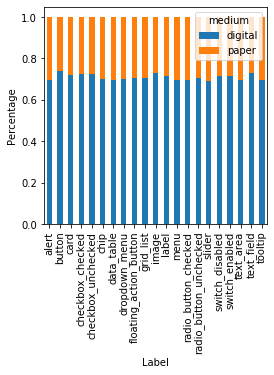

In [10]:
print(pd.crosstab(data["label"],data["medium"]))
Medium = pd.crosstab(data["label"],data["medium"])
Medium.div(Medium.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Label")
plt.ylabel("Percentage")
plt.show()

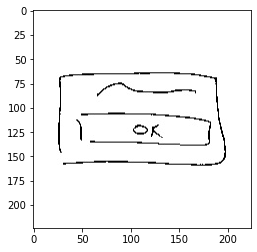

In [14]:
plt.imshow(imgs[2]) # Paper

In [16]:
import tensorflow as tf

In [18]:
x_train = data['image'].to_numpy()
print(x_train[:3])

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

In [ ]:
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000)

### 3.1. Resultados del modelo

## 4. Conclusiones

## 5. Recomendaciones

## Referencias bibliográficas:

1. Brownlee, J. (16 de agosto de 2019). What is Deep Learning?. *Machine Learning Mastery* Recuperado de: https://machinelearningmastery.com/what-is-deep-learning/ 
2. Mandal, M. (1 de mayo de 2021). Introduction to Convolutional Neural Networks (CNN). *Analytics Vidha*. Recuperado de: https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/
3. He, K., Zhang, X., Ren, S., & Sun, J. (2015). *Deep Residual Learning for Image Recognition* Recuperado de: https://arxiv.org/abs/1512.03385
4. Feng, V. (15 de julio de 2020). An Overview of ResNet and its Variants. *Towards Data Science*. Recuperado de: https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035
5. Mutjaba, H. (28 de septiembre de 2020). Introduction to Resnet or Residual Network. *Great Learning*. Recuperado de: https://www.mygreatlearning.com/blog/resnet/ 
6. Boesch, G. (29 de agosto de 2021). Deep Residual Networks (ResNet, ResNet50) – Guide in 2021 *Viso.ai*. Recuperado de: https://viso.ai/deep-learning/resnet-residual-neural-network/
7. TensorFlow (12 de Noviembre de 2021) *Trabajar con capas de preprocesamiento* Recuperado de: https://www.tensorflow.org/guide/keras/preprocessing_layers
8. Pandian, V. (2021). UISketch Dataset *Kaggle* Recuperado de: https://www.kaggle.com/vinothpandian/uisketch 